In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Input data
X = np.array([6, 5, 8, 4, 7, 9])
Y = np.array([6, 5, 7, 3, 5, 2])
data = np.column_stack((X, Y))

data

array([[6, 6],
       [5, 5],
       [8, 7],
       [4, 3],
       [7, 5],
       [9, 2]])

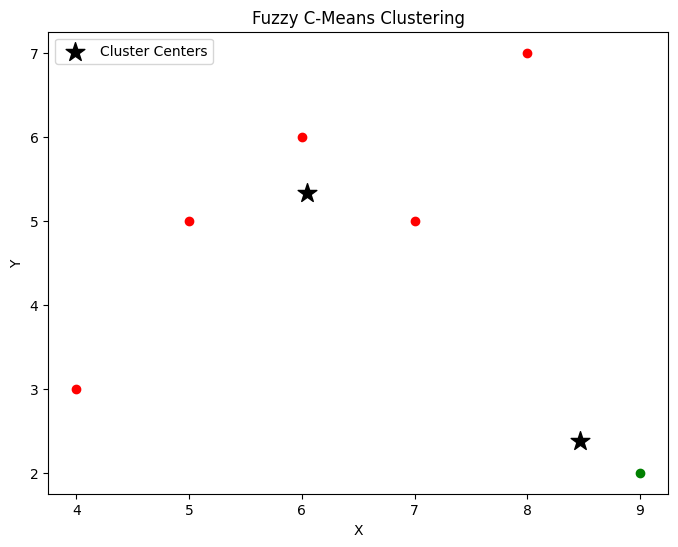

Cluster Centers:
[[6.04797317 5.32575028]
 [8.463908   2.37186286]]


In [3]:
# Parameters
num_clusters = 2
num_objects = len(data)
m = 2
max_iter = 100

# membership matrix
membership = np.array([
    [0.8, 0.2],
    [0.9, 0.1],
    [0.7, 0.3],
    [0.3, 0.7],
    [0.5, 0.5],
    [0.2, 0.8]
])

# calculate cluster centers
def calculate_centers(data, membership, m):
    centers = []
    for j in range(num_clusters):
        numerator = np.sum((membership[:, j] ** m).reshape(-1, 1) * data, axis=0)
        denominator = np.sum(membership[:, j] ** m)
        centers.append(numerator / denominator)
    return np.array(centers)

# update membership values
def update_membership(data, centers, m):
    new_membership = np.zeros((num_objects, num_clusters))
    for i in range(num_objects):
        for j in range(num_clusters):
            dist = np.linalg.norm(data[i] - centers[j])
            if dist == 0:
                new_membership[i, j] = 1
            else:
                new_membership[i, j] = 1 / np.sum([(dist / np.linalg.norm(data[i] - centers[k])) ** (2 / (m - 1)) for k in range(num_clusters)])
    return new_membership

# Fuzzy C-Means algorithm
for _ in range(max_iter):
    centers = calculate_centers(data, membership, m)
    new_membership = update_membership(data, centers, m)
    if np.allclose(membership, new_membership):
        break
    membership = new_membership

# Plotting
plt.figure(figsize=(8, 6))
for i in range(num_objects):
    cluster = np.argmax(membership[i])  # Assign each object to the cluster with highest membership value
    plt.scatter(data[i, 0], data[i, 1], color=['r', 'g'][cluster])
plt.scatter(centers[:, 0], centers[:, 1], c='k', marker='*', s=200, label='Cluster Centers')
plt.legend()
plt.title('Fuzzy C-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


print("Cluster Centers:")
print(centers)